Преподаватель: Олег Булыгин
Что делать

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

Откуда брать данные

Можно взять свой датасет или воспользоваться одним из приведенных ниже:

Данные IMDB;
Данные NYC;
Данные NBA.


In [2]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

# данные с Kaggle
# https://www.kaggle.com/anupammajhi/hr-analytics-predictive-analysis
hr_data = pd.read_csv(
    'general_data.csv')

#     names=['Name', 'Gender', 'Count'])
# Смотрим типы данных для графиков
hr_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

Графики


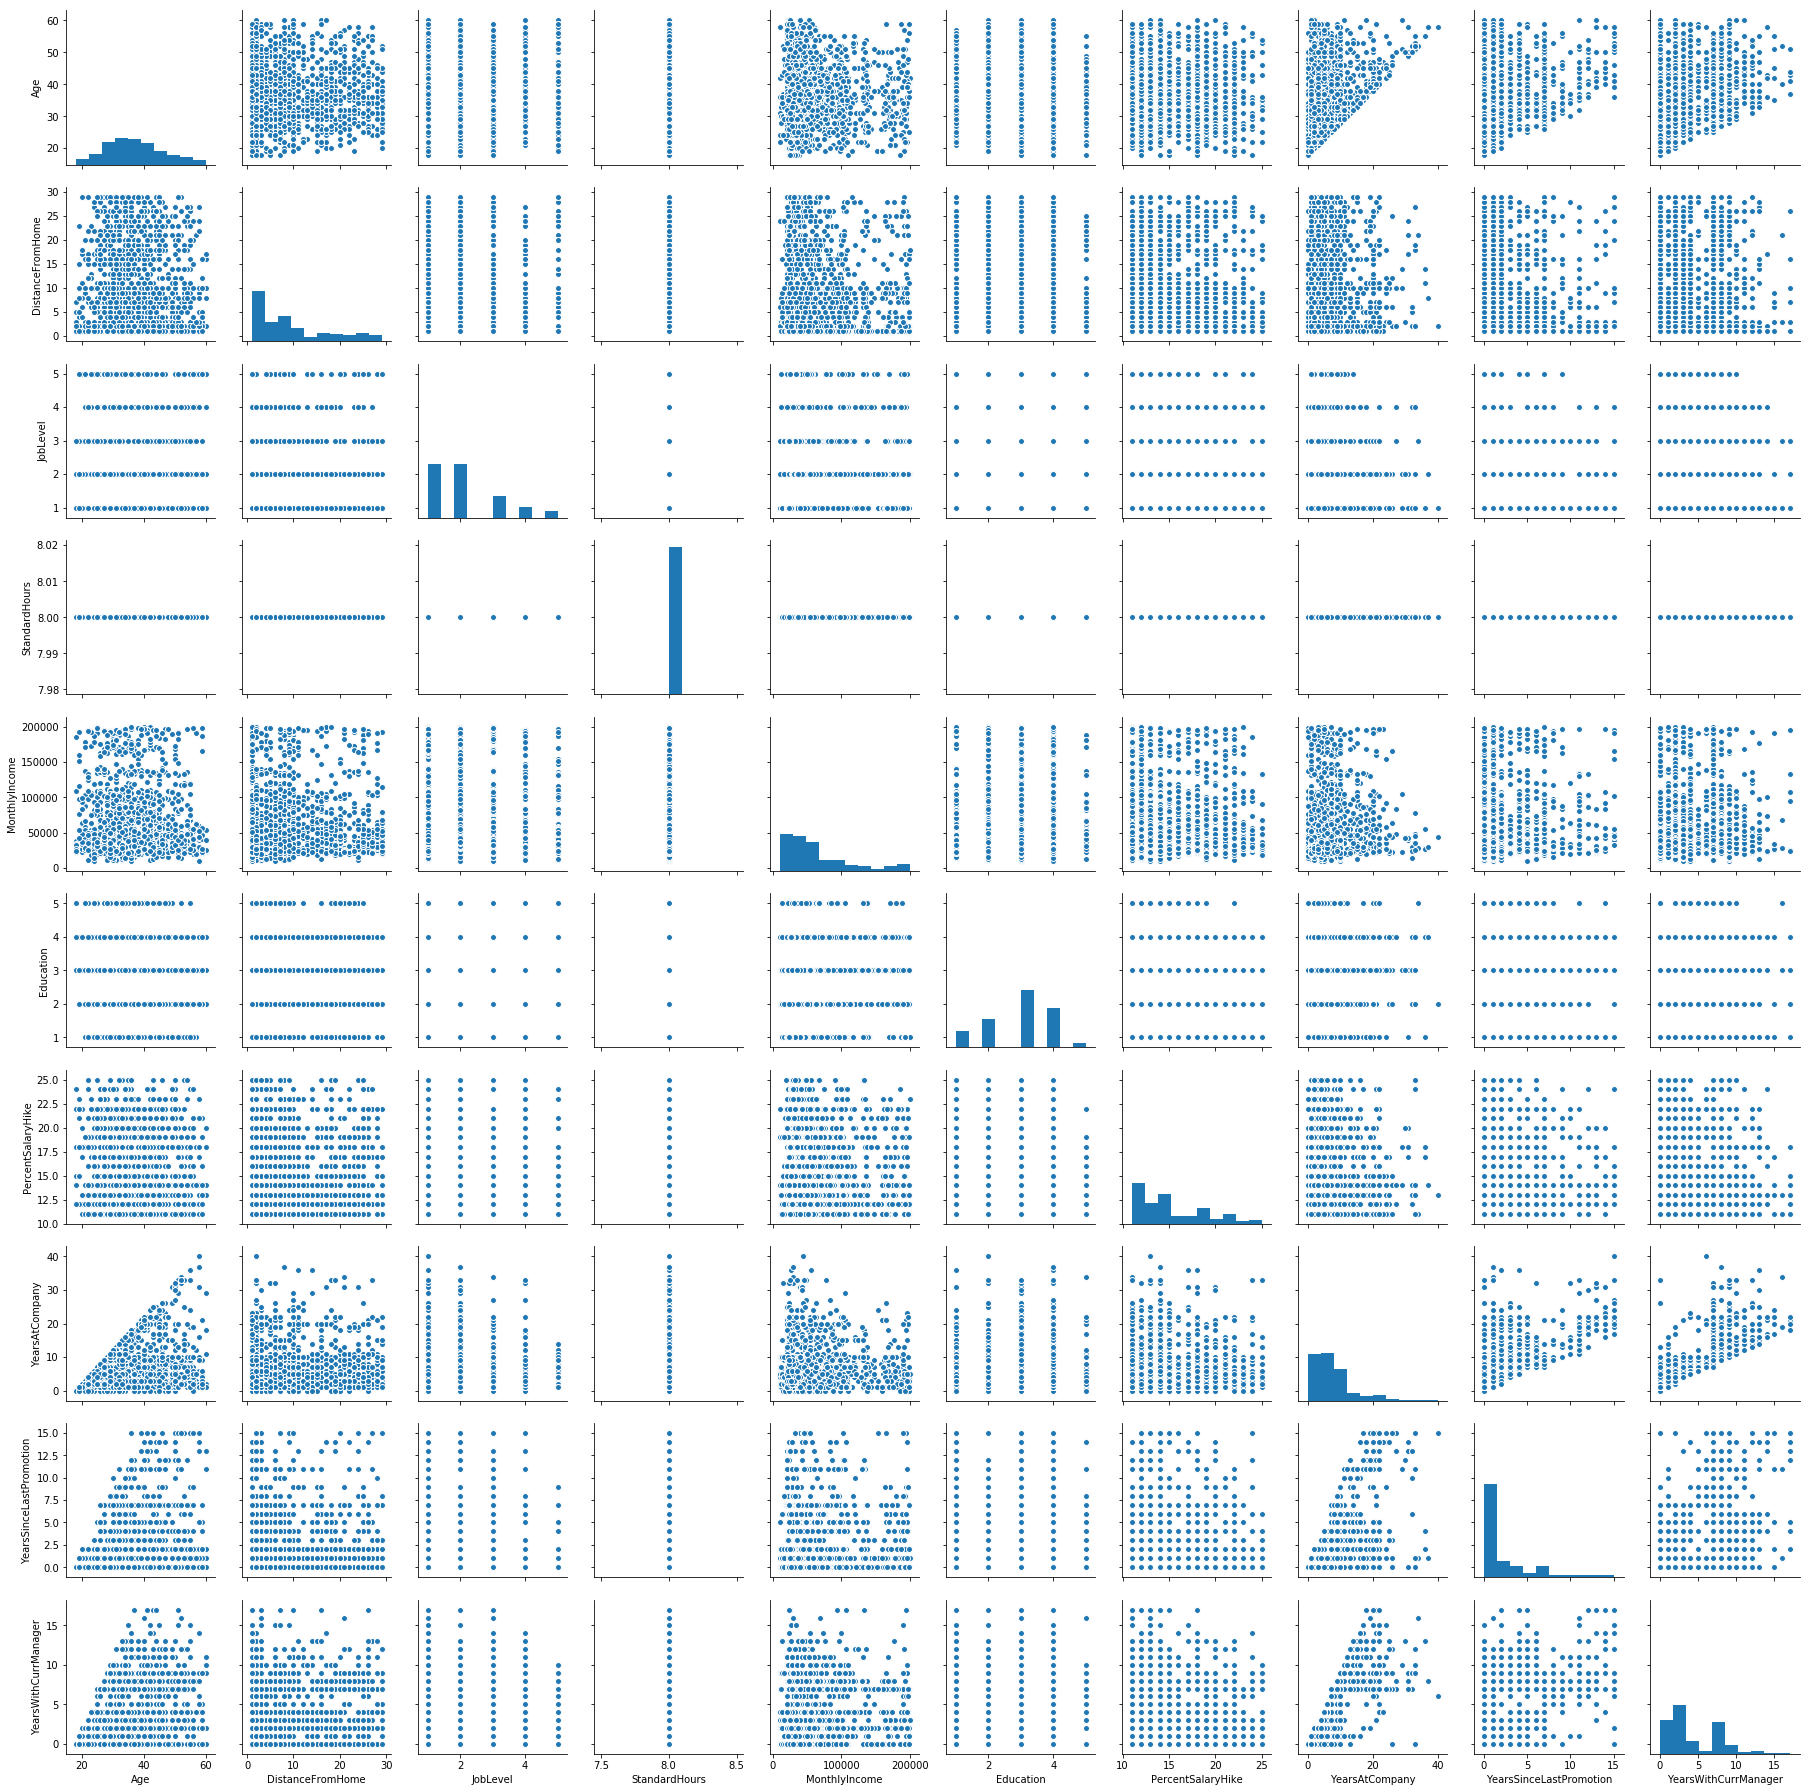

In [66]:
# 1. Коррелограмма всех показателей
# Тип переменных: все
# Цель графика: Посмотреть как данные связаны между собой
# Почему именно этот график: Можно сразу увидеть какие детальнее детальнее анализировать
# Выводы по графику: данного графика не достаточно, пробуем визуализацию из Pandas

hr_data_sns = sns.pairplot(hr_data[
    ['Age',
     'DistanceFromHome',
     'JobLevel',
#      'NumCompaniesWorked',
     'StandardHours',
     'MonthlyIncome',
     'Education', 
     'PercentSalaryHike', 
     'YearsAtCompany', 
     'YearsSinceLastPromotion', 
     'YearsWithCurrManager']
])
# Явных линейных зависомостей не видно, надо подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и joint_plot

In [39]:
# 2. 
# Тип переменных: все
# Цель графика: Посмотреть как данные связаны между собой
# Почему именно этот график: Можно сразу увидеть какие детальнее детальнее анализировать
# Выводы по графику: понятна взаимосвязи между показателями. Формируем сжатый DataFrame
    
# hr_data_short.style.background_gradient(cmap='coolwarm', axis=None)
# plt.matshow(hr_data_short.corr())
# plt.show()
import pandas as pd
import numpy as np

hr_data_short = hr_data[['Age',
     'TotalWorkingYears',
     'YearsAtCompany',
     'YearsWithCurrManager',
     'YearsSinceLastPromotion',
     ]]

# rs = np.random.RandomState(0)
# df = pd.DataFrame(rs.rand(10, 10))
corr = hr_data.corr()
corr.style.background_gradient(cmap='coolwarm')





C:\Users\User\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1,0.00696333,-0.0357063,nan,0.00864882,-0.00288375,-0.0443139,0.299243,-0.0331366,nan,-0.0317528,0.680661,-0.0273079,0.311309,0.216513,0.202089
DistanceFromHome,0.00696333,1,-0.00863818,nan,-0.00109663,-0.0373295,-0.021607,-0.0138428,0.0381246,nan,0.0111687,0.00937367,-0.00900146,0.031684,0.0022896,0.0215837
Education,-0.0357063,-0.00863818,1,nan,-0.00967972,0.0457461,0.00641006,-0.0162502,-0.0405314,nan,0.00126084,-0.0107167,0.0104722,0.00608037,0.0224896,0.00535752
EmployeeCount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EmployeeID,0.00864882,-0.00109663,-0.00967972,nan,1,-0.00330256,0.00733763,-0.00111666,-0.0044565,nan,-0.0142541,-0.00106287,-0.0101909,0.00408594,0.000256122,0.0085788
JobLevel,-0.00288375,-0.0373295,0.0457461,nan,-0.00330256,1,0.0473157,-0.00987482,0.010973,nan,0.000992749,-0.0369569,-0.0325003,-0.0642188,-0.0608111,-0.0552511
MonthlyIncome,-0.0443139,-0.021607,0.00641006,nan,0.00733763,0.0473157,1,-0.0207262,0.0043247,nan,0.0269298,-0.0337871,0.0501123,0.000994946,0.0652193,0.0243042
NumCompaniesWorked,0.299243,-0.0138428,-0.0162502,nan,-0.00111666,-0.00987482,-0.0207262,1,0.0308601,nan,0.0171633,0.238807,-0.0322858,-0.117959,-0.0366563,-0.109667
PercentSalaryHike,-0.0331366,0.0381246,-0.0405314,nan,-0.0044565,0.010973,0.0043247,0.0308601,1,nan,0.0125483,-0.0187359,-0.0373921,-0.0297069,-0.0295424,-0.0408636
StandardHours,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


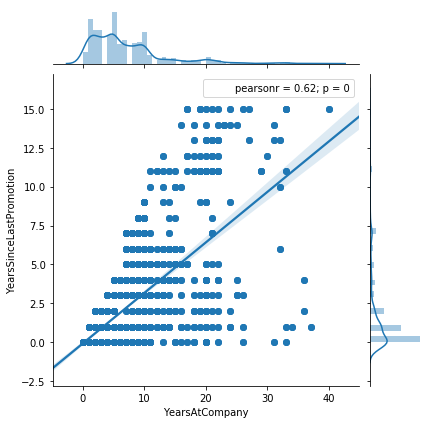

In [40]:
# 3. 
# Тип переменных: int64
# Цель графика: Посмотреть как количество лет работы в компании связано с количеством лет с последнего продвижения 
# Почему именно этот график: Видно распределение (можно определить какой части можно больше доверять)
# Выводы по графику: не надо засиживаться в 1 компании.Также видно что JobLevel не коррелирует с количеством лет в компании. 
# Компания формирует штат с внешнего рынка, а не растит своих

sns.jointplot(x='YearsAtCompany', y='YearsSinceLastPromotion', 
              data=hr_data_short, kind='reg')


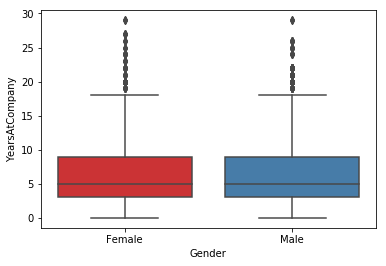

In [65]:
# 4. 
# Тип переменных: Gender(object) + YearsAtCompany(int)
# Цель графика:  Посмотреть есть ли зависимость среднего стажа от пола, чтобы скорректировать массовый поток. 
# Почему именно этот график: Показывает медиану и 25 и 75 персентили. Используется в бизнес-анализе з.пл
# Выводы по графику: На удавление разницы нет. Похоже данные не настоящие, потому что на опыте 3х компаний зависимость есть
# не понятно как 
hr_data_Gender_YearsAtCompany = hr_data[['Gender','YearsAtCompany']]
hr_data_Gender_YearsAtCompany = hr_data_Gender_YearsAtCompany[hr_data_Gender_YearsAtCompany['YearsAtCompany'] < 30]

sns.boxplot(x="Gender", y="YearsAtCompany",  data=hr_data_Gender_YearsAtCompany, palette="Set1")

In [ ]:
# 5. 
# Тип переменных: 
# Цель графика:  
# Почему именно этот график: 
# Выводы по графику: 

In [41]:
hr_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [83]:
# Не хватает данных, чтобы найти и показать что-нибудь интересное. Догрузим

manager_data = pd.read_csv(
    'manager_survey_data.csv')

employee_data = pd.read_csv(
    'employee_survey_data.csv')

survey_data = manager_data.set_index('EmployeeID').join(employee_data.set_index('EmployeeID'))

survey_data.head()
corr_survey = survey_data.corr()
corr_survey.style.background_gradient(cmap='coolwarm')

# Вывод: данные где есть EmployeeID, нет зависимых. Крайне странно
# Тогда посмотрим основные направления деятельности компании (количество людей работающих в отделах)

,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
JobInvolvement,1,0.0106993,0.0154164,0.0040579,-0.0194239
PerformanceRating,0.0106993,1,0.0140574,0.0432611,-0.0230671
EnvironmentSatisfaction,0.0154164,0.0140574,1,-0.00654974,0.0243793
JobSatisfaction,0.0040579,0.0432611,-0.00654974,1,-0.019104
WorkLifeBalance,-0.0194239,-0.0230671,0.0243793,-0.019104,1


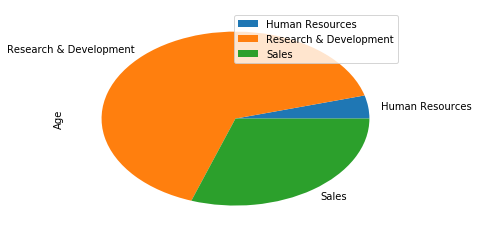

In [94]:
# 6
# Тип переменных: Department(object) + Age(int).count()
# Цель графика:  В каком отделе работает какая часть персонала. 
# Почему именно этот график: Зло, глаз не читает плоскости 3D, но тут можно оставить, потому что он подчеркивает 
# доминирующую часть Research & Development + Sales
# Выводы по графику: большая часть работает в Research & Development

hr_data_dep = hr_data[
    ['Department', 'Age']
]

# hr_data_dep.head()
# Агрегируем количество сотрудников по отделам
hr_data_dep_bar = hr_data_dep.groupby([hr_data_dep.Department]).count()

# Строим график
hr_data_dep_bar.plot(kind='pie', y='Age')